In [2]:
import pandas as pd

carteira = pd.read_excel("Carteira.xlsx")
display(carteira)

,Ativos,Início
0,ITUB4,10000
1,ABEV3,10000
2,VALE3,10000
3,BBDC3,10000


In [10]:
from alpha_vantage.timeseries import TimeSeries
from secrets import chave_api # substitua isso pela sua chave api real do alpha vantage

ts = TimeSeries(key=chave_api, output_format="pandas")
data_inicial = "2021-01-05"

tabelas_acoes = {}
for acao in carteira["Ativos"]:
    data, meta_data = ts.get_daily_adjusted(f"{acao}.SAO", outputsize="full")
    tabelas_acoes[acao] = data
    carteira.loc[carteira["Ativos"]==acao, "Qtde"] = carteira.loc[carteira["Ativos"]==acao, "Início"].values / data.loc[data_inicial, "5. adjusted close"].values
display(carteira)
display(tabelas_acoes["ITUB4"])

,Ativos,Início,Qtde
0,ITUB4,10000,326.223829
1,ABEV3,10000,635.525898
2,VALE3,10000,126.493413
3,BBDC3,10000,471.789355


,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2021-10-26,23.69,23.99,23.48,23.74,23.7400,28725500.0,0.0,1.0
2021-10-25,23.67,24.30,23.67,24.00,24.0000,39732200.0,0.0,1.0
2021-10-22,24.12,24.27,22.91,23.54,23.5400,93446400.0,0.0,1.0
2021-10-21,24.38,25.15,24.12,24.48,24.4800,70701600.0,0.0,1.0
2021-10-20,24.55,25.05,24.31,24.99,24.9900,37764100.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2005-01-07,393.02,398.00,391.01,393.50,5.8371,984700.0,0.0,1.0
2005-01-06,399.01,399.01,391.10,394.00,5.8445,2829670.0,0.0,1.0
2005-01-05,398.00,401.00,395.00,399.00,5.9187,6518330.0,0.0,1.0


In [16]:
# ts.get_symbol_search("BOVA11")
data, meta_data = ts.get_daily_adjusted("BOVA11.SAO", outputsize="full")
ibov = data
display(ibov)

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2021-10-26,103.37,103.64,102.20,102.25,102.25,11078150.0,0.0,1.0
2021-10-25,103.74,105.24,102.96,104.55,104.55,23301463.0,0.0,1.0
2021-10-22,102.46,103.77,98.88,102.33,102.33,27147453.0,0.0,1.0
2021-10-21,104.49,105.31,101.62,103.65,103.65,15143144.0,0.0,1.0
2021-10-20,107.19,107.78,105.90,106.73,106.73,10243284.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2008-12-08,37.35,38.46,36.95,38.46,38.46,103100.0,0.0,1.0
2008-12-05,34.51,35.35,34.11,35.35,35.35,193700.0,0.0,1.0
2008-12-04,35.80,36.00,35.15,35.70,35.70,128400.0,0.0,1.0


<AxesSubplot:xlabel='date'>

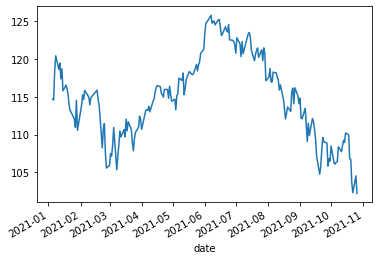

In [17]:
data_final = "2021-10-26"
ibov = ibov.loc[data_final : data_inicial, "5. adjusted close"]
ibov.plot()

In [18]:
tabela_cotacoes = pd.DataFrame()

for acao in tabelas_acoes:
    tabela_cotacoes[acao] = tabelas_acoes[acao].loc[data_final : data_inicial, "5. adjusted close"]
display(tabela_cotacoes)

,ITUB4,ABEV3,VALE3,BBDC3
date,,,,
2021-10-26,23.7400,15.1600,76.1800,17.2800
2021-10-25,24.0000,15.2700,77.0000,17.6900
2021-10-22,23.5400,15.0000,76.0800,17.4100
2021-10-21,24.4800,15.1400,75.1600,18.0000
2021-10-20,24.9900,15.4100,76.6700,18.5300
...,...,...,...,...
2021-01-11,32.0317,16.0236,86.6891,21.7558
2021-01-08,32.7706,16.4516,86.7061,22.0900
2021-01-07,32.7806,15.9739,86.9781,22.2615


In [19]:
for acao in tabela_cotacoes.columns:
    tabela_cotacoes[acao] = tabela_cotacoes[acao] * carteira.loc[carteira["Ativos"]==acao, "Qtde"].values
display(tabela_cotacoes)

,ITUB4,ABEV3,VALE3,BBDC3
date,,,,
2021-10-26,7744.553693,9634.572609,9636.268191,8152.520063
2021-10-25,7829.371889,9704.480458,9739.992790,8345.953699
2021-10-22,7679.308927,9532.888465,9623.618850,8213.852679
2021-10-21,7985.959326,9621.862091,9507.244910,8492.208399
2021-10-20,8152.333479,9793.454083,9698.249964,8742.256757
...,...,...,...,...
2021-01-11,10449.503814,10183.412774,10965.600116,10264.154860
2021-01-08,10690.550601,10455.417858,10967.750504,10421.826863
2021-01-07,10693.812839,10151.827137,11002.156713,10502.738737


In [20]:
tabela_cotacoes["Total"] = tabela_cotacoes.sum(axis=1)
display(tabela_cotacoes)

,ITUB4,ABEV3,VALE3,BBDC3,Total
date,,,,,
2021-10-26,7744.553693,9634.572609,9636.268191,8152.520063,35167.914556
2021-10-25,7829.371889,9704.480458,9739.992790,8345.953699,35619.798835
2021-10-22,7679.308927,9532.888465,9623.618850,8213.852679,35049.668922
2021-10-21,7985.959326,9621.862091,9507.244910,8492.208399,35607.274726
2021-10-20,8152.333479,9793.454083,9698.249964,8742.256757,36386.294283
...,...,...,...,...,...
2021-01-11,10449.503814,10183.412774,10965.600116,10264.154860,41862.671564
2021-01-08,10690.550601,10455.417858,10967.750504,10421.826863,42535.545826
2021-01-07,10693.812839,10151.827137,11002.156713,10502.738737,42350.535426


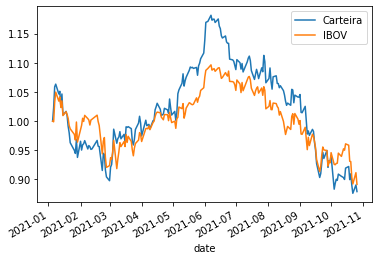

In [24]:
carteira_ajustado = tabela_cotacoes["Total"] / tabela_cotacoes["Total"].iloc[-1]
ibov_ajustado = ibov / ibov.iloc[-1]

import matplotlib.pyplot as plt

carteira_ajustado.plot(label="Carteira")
ibov_ajustado.plot(label="IBOV")
plt.legend()
plt.show()

In [26]:
retorno_carteira = carteira_ajustado[0] - 1
retorno_indice = ibov_ajustado[0] - 1

print(retorno_carteira, retorno_indice)

# display(carteira_ajustado)

-0.1208021360952487 -0.10846630046211525
